In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cpu


In [ ]:
# 데이터 준비 1. 핸드폰, 전면, 이마, 메타데이터 전체

import pickle

path = "/content/drive/MyDrive/Human_Final_Project/Data/Train_Data_Sets_02.pkl"
with open(path, "rb") as pickle_file:
    train_data_sets = pickle.load(pickle_file)
    print("데이터 로드 완료!!")

데이터 로드 완료!!


In [ ]:
# print(train_data_sets.keys())
# print(train_data_sets['Images'].keys())
# print(train_data_sets['Images']['0002_03_F_01'])
# print(train_data_sets['Metadata'].keys())
# print(train_data_sets['Metadata']['0002_03_F_01'].keys())
# print(train_data_sets['Metadata']['0002_03_F_01']['annotations'].keys())
# print(train_data_sets['Metadata']['0002_03_F_01']['annotations']['forehead_pigmentation'])

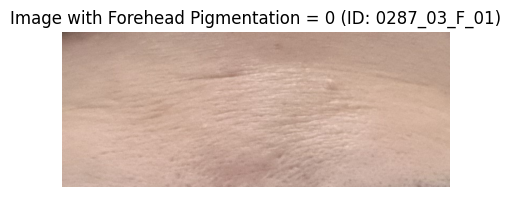

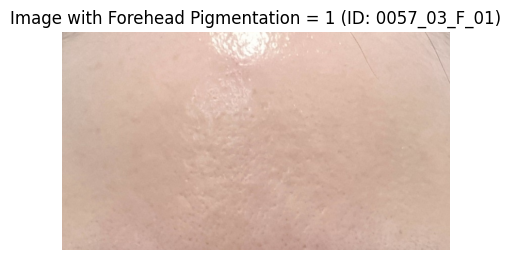

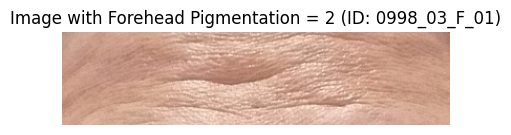

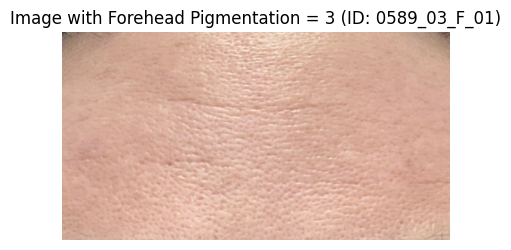

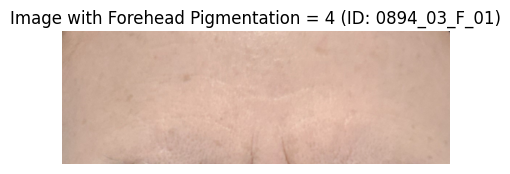

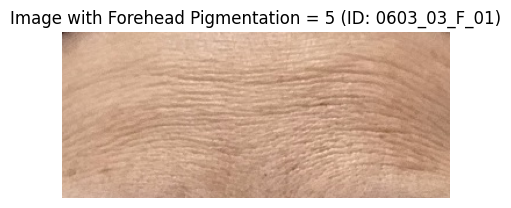

In [ ]:
def display_images_by_target(target_values):
    """
    특정 타겟값(forehead_pigmentation)에 해당하는 이미지를 랜덤으로 1장씩 출력.

    Args:
        target_values (list): 출력하고자 하는 타겟값 리스트 (예: [0, 1, 2]).
    """
    metadata = train_data_sets['Metadata']
    images = train_data_sets['Images']

    for target_value in target_values:
        matching_images = []

        for key, data in metadata.items():
            # 타겟값이 일치하는 경우 이미지 ID와 데이터를 추가
            if data['annotations']['forehead_pigmentation'] == target_value:
                matching_images.append((key, images[key]))

        if matching_images:
            # 랜덤으로 1장의 이미지를 선택
            image_id, image_data = random.choice(matching_images)

            # 이미지 데이터를 RGB로 변환 (BGR -> RGB)
            if image_data.shape[-1] == 3:  # 이미지가 BGR일 경우
                image_data = image_data[..., ::-1]  # 마지막 채널 순서를 반전하여 RGB로 변환

            # 타이틀 설정 및 시각화
            plt.figure(figsize=(5, 5))
            plt.title(f"Image with Forehead Pigmentation = {target_value} (ID: {image_id})", fontsize=12)
            plt.imshow(image_data)  # numpy 배열 이미지를 RGB로 표시
            plt.axis('off')
            plt.show()
        else:
            print(f"No images found for Forehead Pigmentation = {target_value}")

# 사용 예시
display_images_by_target([0, 1, 2, 3, 4, 5])